In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.metrics import accuracy_score
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_digits, load_wine, load_breast_cancer, load_iris

Define kernels and datasets

In [18]:
# Kernels
svm1 = LinearSVC(dual=False)
svm1.name = 'linear_kernel'

svm2 = SVC(C=1.0, kernel='poly', degree=3, gamma=2, max_iter = 1)
svm2.name = 'poly_kernel'

svm3 = SVC(kernel='sigmoid')
svm3.name = 'sigmoid_kernel'

svm4 = SVC(kernel='rbf')
svm4.name = 'rbf_kernel'

# Datasets
dataset1 = load_digits()
dataset1.name = 'ds_digits'

dataset2 = load_iris()
dataset2.name = 'ds_iris'

dataset3 = load_wine()
dataset3.name = 'ds_wine'

dataset4 = load_breast_cancer()
dataset4.name = 'ds_breast_cancer'

Evaluate the accuracy and time complexity for each kernel and each dataset

In [19]:
list_acc = []
list_train_time = []

rounding_num = 4

for svm in [svm1, svm2, svm3, svm4]:
    list_acc_for_one_ds = []
    list_train_time_for_one_ds = []

    for dataset in [dataset1, dataset2, dataset3, dataset4]:
        # dataset1.name = 'ds1'
        # dataset2.name = 'ds2'
        # dataset3.name = 'ds3'

        ## PREPROCESS 
        # Read the DataFrame, first using the feature data
        df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

        # Add a target column, and fill it with the target data
        df['target'] = dataset.target

        # Store the feature data
        x = dataset.data

        # store the target data
        y = dataset.target

        # split the data using Scikit-Learn's train_test_splitfrom sklearn.model_selection import train_test_split
        x_train, x_test, y_train, y_test = train_test_split(x, y)    
        
        # measuring training time
        start = time.time()

        ## TRAIN SVM
        svm.fit(x_train, y_train)
        
        # measuring training time
        stop = time.time()
        # print(f"Training time for {svm.name, dataset.name}: {stop - start}s")
        train_time = stop - start
        train_time = round(train_time, rounding_num)
        list_train_time_for_one_ds.append(train_time)

        # compare whether the svm predicted the right target/label for the test dataset
        pred_test = svm.predict(x_test)
        acc = accuracy_score(y_test, pred_test, normalize=True)

        # round up the number until the 2nd decimal number
        acc = round(acc, rounding_num) 

        # append the accuracy to the list of accuracy for one dataset
        list_acc_for_one_ds.append(acc)
        
        # print(svm.name, dataset.name, acc)

    # append the list of accuracies for one dataset to the list of accuracies for the all 3 datasets
    # for example, the first list inside the list_acc is the accuracies of the dataset1
    list_acc.append(list_acc_for_one_ds)   
    list_train_time.append(list_train_time_for_one_ds) 
    # print(list_acc)


C:\Users\prizl\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\prizl\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\prizl\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\prizl\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [23]:
df_perform = pd.DataFrame(list_acc, index = ['linear kernel', 'polynomial kernel','RBF kernel', 'sigmoid kernel'], 
                                    columns= ['dataset 1', 'dataset 2', 'dataset 3', 'dataset 4'])
df_time = pd.DataFrame(list_train_time, index = ['linear kernel', 'polynomial kernel','RBF kernel', 'sigmoid kernel'], 
                                    columns= ['dataset 1', 'dataset 2', 'dataset 3', 'dataset 4'])

df_perform

,linear kernel,polynomial kernel,RBF kernel,sigmoid kernel
dataset 1,0.9489,0.9737,1.0000,0.9580
dataset 2,0.5156,0.7895,0.0667,0.7622
dataset 3,0.9067,0.2632,0.2000,0.3846
dataset 4,0.9822,0.9737,0.6444,0.9161


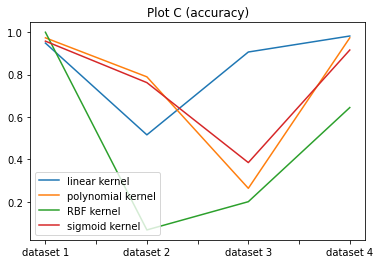

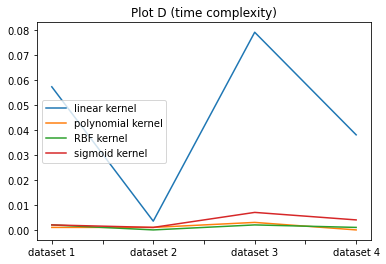

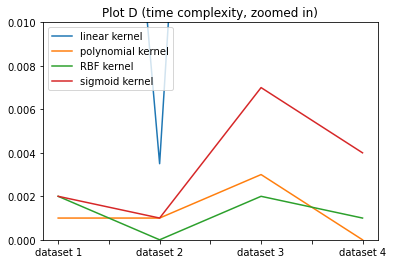

In [21]:
plot_c = df_perform.plot(title="Plot C (accuracy)")
plot_d = df_time.plot(title="Plot D (time complexity)")

plot_c=plot_c.figure
plot_c.savefig(f'image/plot_c.jpg')

plot_d_1=plot_d.figure
plot_d_1.savefig(f'image/plot_d_1.jpg')

plot_d_2 = df_time.plot(title="Plot D (time complexity, zoomed in)")
plot_d_2.set_ylim(0,0.01)
plot_d_2=plot_d_2.figure
plot_d_2.savefig(f'image/plot_d_2.jpg')